#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [114]:
# Read CSV
df = pd.read_csv("https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [115]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


Periksa apakah ada missing values

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Periksa outlier dengan boxplot untuk setiap kolom feature

<ipython-input-117-1d14f2c7426f>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_1.set_xticklabels(["setosa", "versicolor", "virginica"])


{'whiskers': [<matplotlib.lines.Line2D at 0x7ee754a9dcc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee754a9ddb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee754a9da20>,
 'medians': [<matplotlib.lines.Line2D at 0x7ee754a9ded0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ee754a9e170>,
 'means': []}

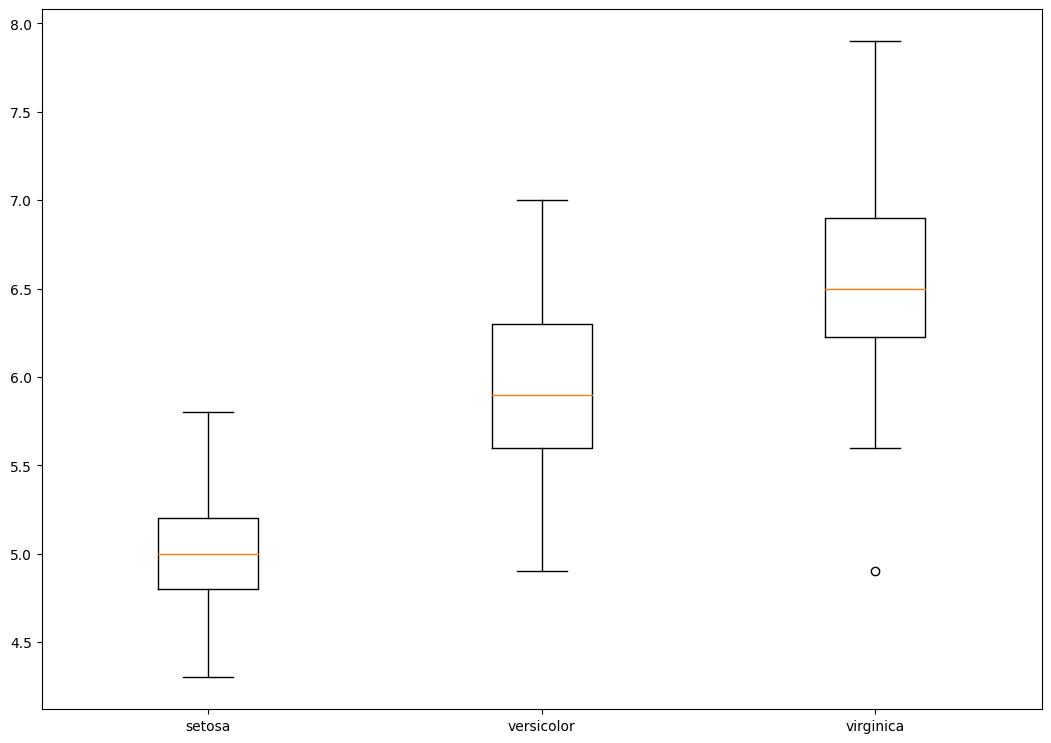

In [117]:
ax_1 = plt.figure(figsize =(10, 7)).add_axes([0, 0, 1, 1])
ax_1.set_xticklabels(["setosa", "versicolor", "virginica"])
ax_1.boxplot([df[df["species"] == "setosa"]["sepal_length"], df[df["species"] == "versicolor"]["sepal_length"], df[df["species"] == "virginica"]["sepal_length"]])

<ipython-input-118-3388e391dc00>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_2.set_xticklabels(["setosa", "versicolor", "virginica"])


{'whiskers': [<matplotlib.lines.Line2D at 0x7ee754b4a710>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee754b48d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee754b4a4a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ee754b4aad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ee754b4ad70>,
 'means': []}

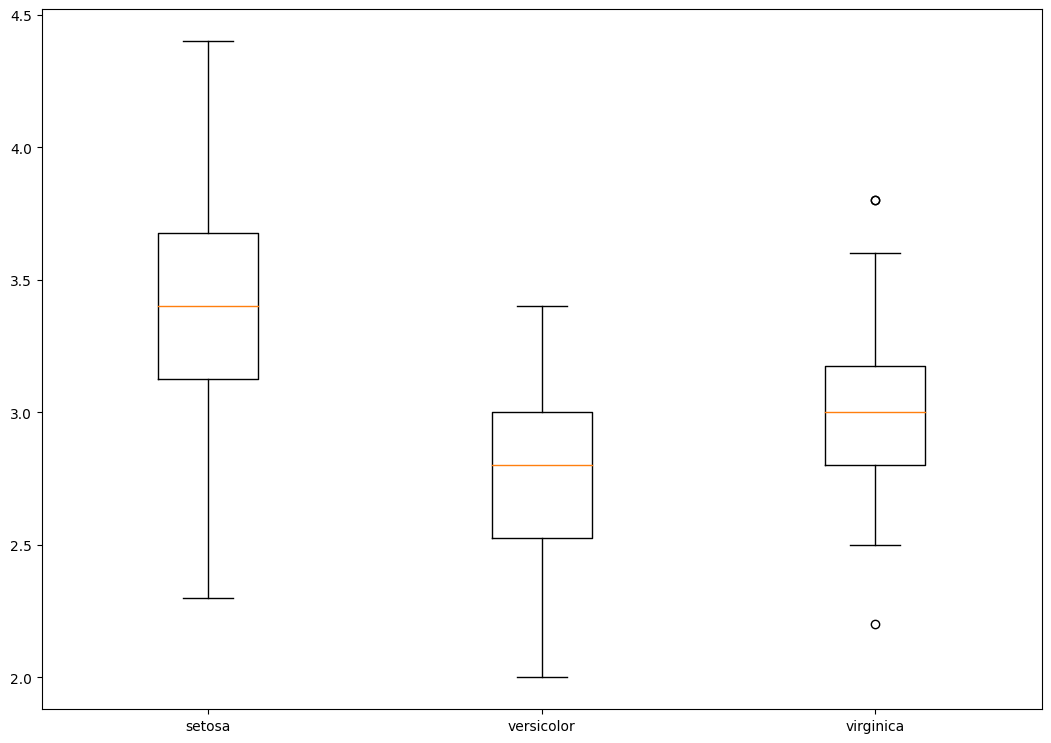

In [118]:
ax_2 = plt.figure(figsize =(10, 7)).add_axes([0, 0, 1, 1])
ax_2.set_xticklabels(["setosa", "versicolor", "virginica"])
ax_2.boxplot([df[df["species"] == "setosa"]["sepal_width"], df[df["species"] == "versicolor"]["sepal_width"], df[df["species"] == "virginica"]["sepal_width"]])

<ipython-input-119-111882bd86da>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_3.set_xticklabels(["setosa", "versicolor", "virginica"])


{'whiskers': [<matplotlib.lines.Line2D at 0x7ee7549edde0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee7549ee320>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee7549edb40>,
 'medians': [<matplotlib.lines.Line2D at 0x7ee7549ee860>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ee7549eeb00>,
 'means': []}

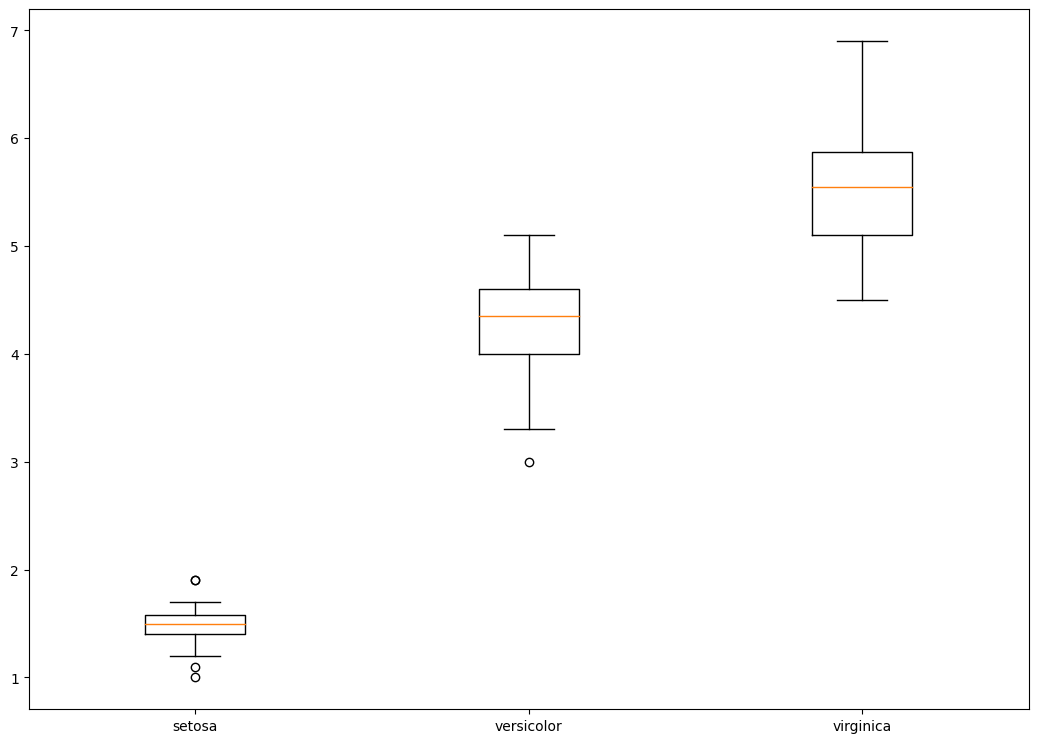

In [119]:
ax_3 = plt.figure(figsize =(10, 7)).add_axes([0, 0, 1, 1])
ax_3.set_xticklabels(["setosa", "versicolor", "virginica"])
ax_3.boxplot([df[df["species"] == "setosa"]["petal_length"], df[df["species"] == "versicolor"]["petal_length"], df[df["species"] == "virginica"]["petal_length"]])

<ipython-input-120-2b1ce694d393>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_4.set_xticklabels(["setosa", "versicolor", "virginica"])


{'whiskers': [<matplotlib.lines.Line2D at 0x7ee75489a3b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee75489a8f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee75489a110>,
 'medians': [<matplotlib.lines.Line2D at 0x7ee7548988e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ee754898550>,
 'means': []}

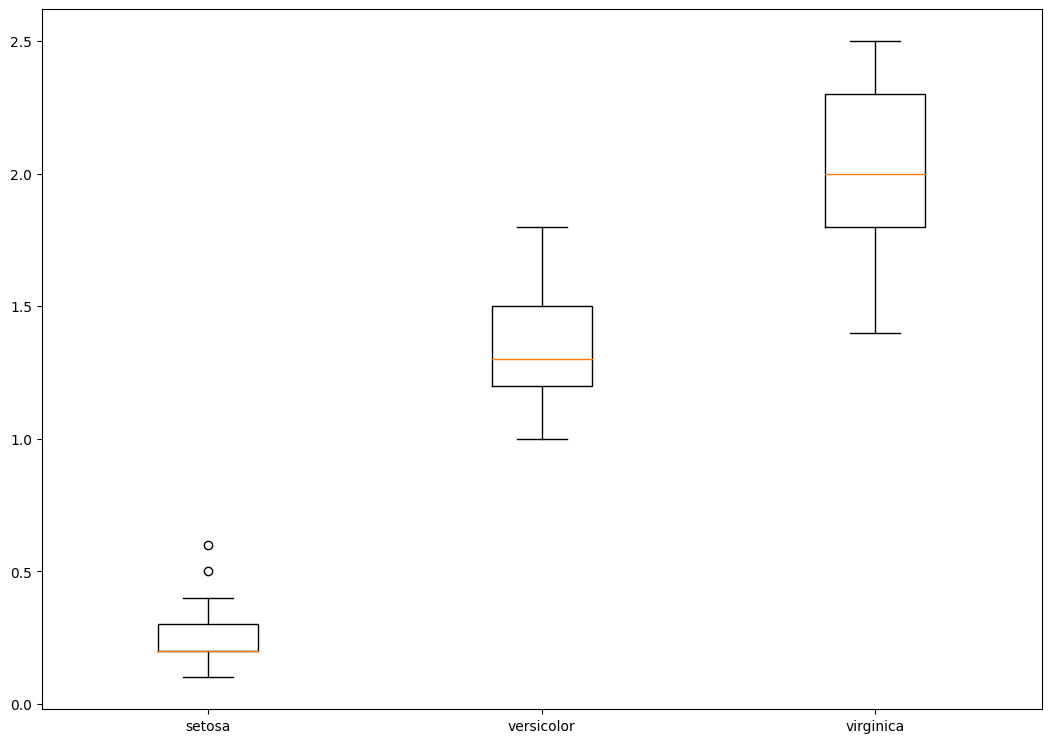

In [120]:
ax_4 = plt.figure(figsize =(10, 7)).add_axes([0, 0, 1, 1])
ax_4.set_xticklabels(["setosa", "versicolor", "virginica"])
ax_4.boxplot([df[df["species"] == "setosa"]["petal_width"], df[df["species"] == "versicolor"]["petal_width"], df[df["species"] == "virginica"]["petal_width"]])


Pisahkan dataset menjadi variabel independen dan variabel dependen

In [121]:
x = df.filter(["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = df["species"]

y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

Lakukan fitur scaling.

In [122]:
sc = StandardScaler()
sc.fit(x)
x = sc.transform(x)

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [124]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

Uji model dengan dataset test

In [125]:
y_pred = lr.predict(x_test)

accuracy_score(y_test, y_pred)

0.8666666666666667

# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [126]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

Uji hasil model dengan data test

In [127]:
y_pred = nb.predict(x_test)
y_pred

array(['setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa'], dtype='<U10')

Ukur akurasi dari model persamaan Naive Bayes Classifier

In [128]:
accuracy_score(y_test, y_pred)

0.8666666666666667

# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [130]:
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [131]:
y_pred = knn.predict(x_test)
y_pred

array(['setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa'], dtype=object)

Ukur akurasi dari model K-Nearest Neighbor

In [132]:
accuracy_score(y_test, y_pred)

0.8666666666666667

#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...